In [61]:
import tensorflow as tf

In [62]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [63]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [64]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [65]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [66]:
import matplotlib.pyplot as plt

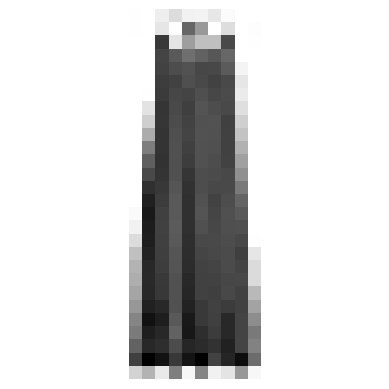

In [67]:
plt.imshow(X_train[2137], cmap="binary")
plt.axis('off')
plt.show()

In [68]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka", "sandał", "koszula", "but", "torba", "kozak"]

In [69]:
class_names[y_train[2137]]

'sukienka'

In [82]:
model = tf.keras.models.Sequential()

In [84]:
model.add(tf.keras.layers.InputLayer(input_shape=(28, 28)))

In [85]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

In [86]:
model.add(tf.keras.layers.Dense(300))

In [87]:
model.add(tf.keras.layers.Dense(100))

In [88]:
model.add(tf.keras.layers.Dense(10))

In [90]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [91]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [92]:
import os
import time

def generate_log_dir():
    current_time = time.strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("image_logs", current_time)
    return log_dir

if not os.path.exists("image_logs"):
    os.makedirs("image_logs")

log_dir = generate_log_dir()

tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [93]:
model.fit(X_train, y_train, epochs=20, callbacks=[tensorboard], validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 2s 1ms/step - loss: 4.4070 - accuracy: 0.1013 - val_loss: 3.8736 - val_accuracy: 0.1325
Epoch 2/20
1688/1688 [==============================] - 2s 973us/step - loss: 3.6243 - accuracy: 0.1447 - val_loss: 3.5915 - val_accuracy: 0.0965
Epoch 3/20
1688/1688 [==============================] - 2s 962us/step - loss: 2.1866 - accuracy: 0.2533 - val_loss: 1.7975 - val_accuracy: 0.2703
Epoch 4/20
1688/1688 [==============================] - 2s 961us/step - loss: 3.8203 - accuracy: 0.1867 - val_loss: 4.9297 - val_accuracy: 0.0985
Epoch 5/20
1688/1688 [==============================] - 2s 970us/step - loss: 3.2776 - accuracy: 0.1497 - val_loss: 1.9559 - val_accuracy: 0.2038
Epoch 6/20
1688/1688 [==============================] - 2s 977us/step - loss: 2.2073 - accuracy: 0.1917 - val_loss: 3.7300 - val_accuracy: 0.1207
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 3.7566 - accuracy: 0.1241 - val_loss: 3.5936 - val

In [94]:
model.predict(X_test)

313/313 [==============================] - 0s 535us/step


array([[ 370.8873  ,  273.3206  ,   88.144646, ...,  -76.66304 ,
         381.39432 ,  299.3894  ],
       [ 997.6204  ,  881.45    ,  485.2092  , ..., -417.5423  ,
         918.0166  ,  380.74857 ],
       [ 458.37115 ,  457.87878 ,  212.09906 , ..., -186.5584  ,
         466.73798 ,  187.78024 ],
       ...,
       [ 651.5129  ,  548.52094 ,  239.59052 , ..., -215.27867 ,
         618.98395 ,  347.0391  ],
       [ 313.11218 ,  307.24536 ,  136.75504 , ..., -119.22866 ,
         323.127   ,  147.72227 ],
       [ 294.8104  ,  224.22739 ,   81.44745 , ...,  -72.895515,
         299.44257 ,  210.91179 ]], dtype=float32)

In [95]:
import numpy as np

1/1 [==============================] - 0s 15ms/step
Prediction: koszulka
Confidence: 685.0898
Truth: pulower


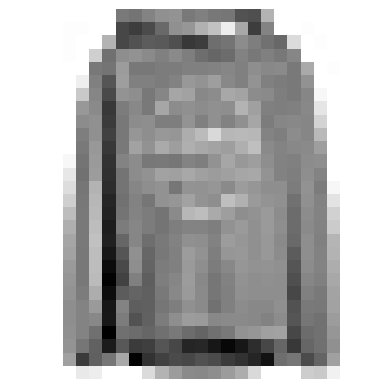

In [96]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [22]:
import pickle

In [23]:
with open('fashion_clf.keras', 'wb') as f:
    pickle.dump(model, f)

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
housing = fetch_california_housing()

In [26]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [27]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)

In [28]:
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Normalization(axis=-1))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(units=1))

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [31]:
def generate_log_dir():
    current_time = time.strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("housing_logs", current_time)
    return log_dir

if not os.path.exists("housing_logs"):
    os.makedirs("housing_logs")

log_dir = generate_log_dir()

In [32]:
callback_early = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.1, verbose=1, monitor='loss')

In [33]:
callback_board = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [34]:
history = model.fit(X_train, y_train, epochs=20, callbacks=[callback_early, callback_board])

Epoch 1/20
516/516 [==============================] - 0s 485us/step - loss: 2484.2969 - mae: 10.2723
Epoch 2/20
516/516 [==============================] - 0s 475us/step - loss: 2.3023 - mae: 1.0390
Epoch 3/20
516/516 [==============================] - 0s 476us/step - loss: 2.4857 - mae: 0.9611
Epoch 4/20
516/516 [==============================] - 0s 477us/step - loss: 1.6417 - mae: 0.9212
Epoch 5/20
516/516 [==============================] - 0s 477us/step - loss: 458.2977 - mae: 5.9713
Epoch 6/20
516/516 [==============================] - 0s 481us/step - loss: 0.9169 - mae: 0.7461
Epoch 7/20
516/516 [==============================] - 0s 485us/step - loss: 1.0876 - mae: 0.7687
Epoch 8/20
516/516 [==============================] - 0s 485us/step - loss: 2.1346 - mae: 0.9531
Epoch 9/20
516/516 [==============================] - 0s 485us/step - loss: 1.3024 - mae: 0.8019
Epoch 10/20
516/516 [==============================] - 0s 486us/step - loss: 47.6463 - mae: 3.1183
Epoch 11/20
516/516 [=

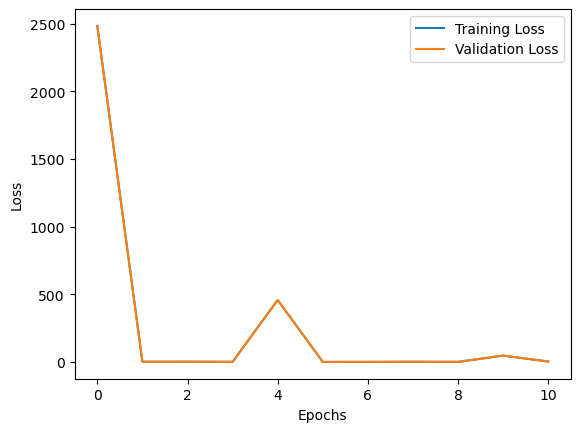

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
with open('reg_housing_1.keras', 'wb') as f:
    pickle.dump(model, f)

In [37]:
model = tf.keras.models.Sequential()

In [38]:
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(units=1))

In [39]:
def generate_log_dir():
    current_time = time.strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("housing_logs/1", current_time)
    return log_dir

if not os.path.exists("housing_logs/1"):
    os.makedirs("housing_logs/1")

log_dir = generate_log_dir()

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [41]:
history = model.fit(X_train, y_train, epochs=10, callbacks=[callback_early, callback_board])

Epoch 1/10
516/516 [==============================] - 0s 411us/step - loss: 2347.7285 - mae: 12.4451
Epoch 2/10
516/516 [==============================] - 0s 412us/step - loss: 2.4676 - mae: 1.2059
Epoch 3/10
516/516 [==============================] - 0s 401us/step - loss: 1.0426 - mae: 0.7719
Epoch 4/10
516/516 [==============================] - 0s 402us/step - loss: 0.8803 - mae: 0.7059
Epoch 5/10
516/516 [==============================] - 0s 405us/step - loss: 1.6851 - mae: 0.7673
Epoch 6/10
516/516 [==============================] - 0s 403us/step - loss: 1.8312 - mae: 0.8044
Epoch 7/10
516/516 [==============================] - 0s 399us/step - loss: 1.4488 - mae: 0.8061
Epoch 8/10
516/516 [==============================] - 0s 404us/step - loss: 62.0007 - mae: 2.6745
Epoch 9/10
516/516 [==============================] - 0s 402us/step - loss: 1.6582 - mae: 0.8336
Epoch 9: early stopping


In [42]:
with open('reg_housing_2.keras', 'wb') as f:
    pickle.dump(model, f)

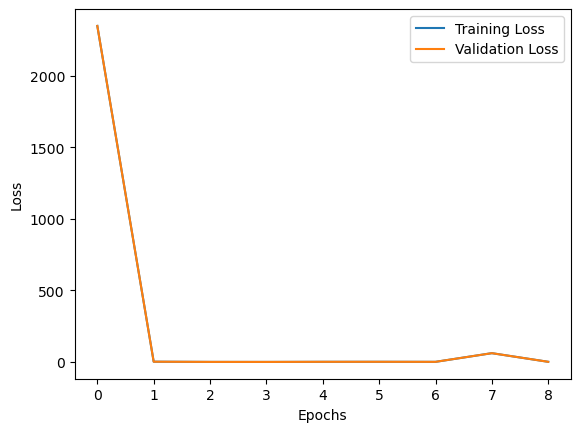

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [44]:
def generate_log_dir():
    current_time = time.strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("housing_logs/2", current_time)
    return log_dir

if not os.path.exists("housing_logs/2"):
    os.makedirs("housing_logs/2")

log_dir = generate_log_dir()

In [45]:
model = tf.keras.models.Sequential()

In [46]:
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(75))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(units=1))

In [47]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [48]:
history = model.fit(X_train, y_train, epochs=20, callbacks=[callback_early, callback_board])

Epoch 1/20
516/516 [==============================] - 0s 571us/step - loss: 8977.3008 - mae: 20.7692
Epoch 2/20
516/516 [==============================] - 0s 576us/step - loss: 2.2133 - mae: 0.9434
Epoch 3/20
516/516 [==============================] - 0s 576us/step - loss: 1.5830 - mae: 0.8281
Epoch 4/20
516/516 [==============================] - 0s 573us/step - loss: 7.5556 - mae: 1.3848
Epoch 5/20
516/516 [==============================] - 0s 574us/step - loss: 34.4579 - mae: 2.6793
Epoch 6/20
516/516 [==============================] - 0s 576us/step - loss: 18.5543 - mae: 2.1006
Epoch 7/20
516/516 [==============================] - 0s 578us/step - loss: 3628.2283 - mae: 13.9055
Epoch 8/20
516/516 [==============================] - 0s 573us/step - loss: 2.9097 - mae: 1.3381
Epoch 8: early stopping


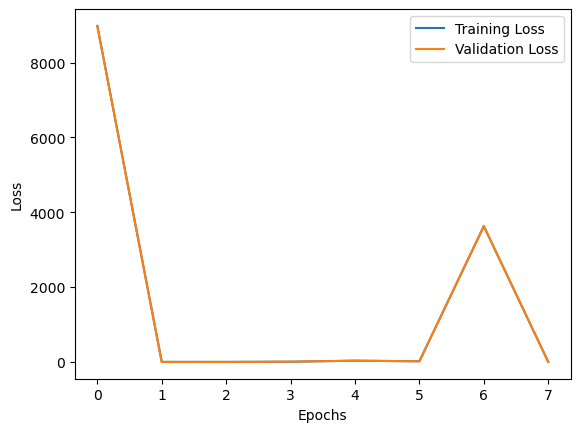

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [50]:
with open('reg_housing_3.keras', 'wb') as f:
    pickle.dump(model, f)